In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pairwise_evaluator import Pairwise_evaluator

In [39]:
n = 14
fname = f"{n}spin"

data_all = np.loadtxt(f"../output_small/{fname}/{fname}_sep-output.p",dtype=np.double)
# data_all = np.loadtxt(f"../output_small/control_data/p7.p",dtype=np.double)

data_pi = data_all[:n]
data_pij = data_all[n:]

In [40]:
# load model evaluator
model_j_path = f"../output_small/{fname}/{fname}_sep-output-out.j"
mod = Pairwise_evaluator(model_j_path,n)
mod.load_ising_paramters()
mod.calc_partitionf()
inp = mod.all_states
model_pi = mod.spin_avgs()
model_pij = mod.spin_correls()

In [41]:
data_pi.shape, data_pij.shape, model_pi.shape, model_pij.shape

((14,), (91,), (14,), (91,))

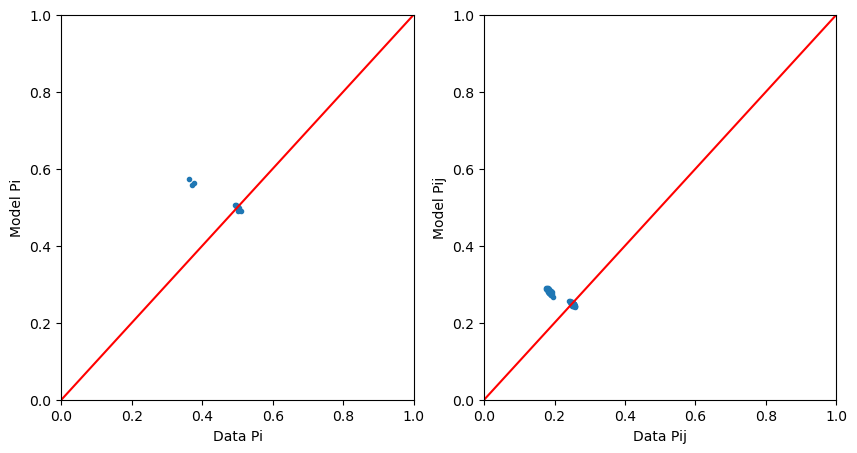

In [45]:


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# for ax in axs:
#     ax.set_aspect('equal', 'box')

ax = axs[0]
ax.scatter(data_pi, model_pi,marker=".")
ax.set_xlabel('Data Pi')
ax.set_ylabel('Model Pi')

ax = axs[1]
ax.scatter(data_pij, model_pij,marker=".")
ax.set_xlabel('Data Pij')
ax.set_ylabel('Model Pij')

for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.plot([0, 1], [0, 1], color='red') 



plt.show()
